# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'/Users/hollyringsak/Documents/6.1 KCA House Data'
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_clean.csv'), index_col= False)

# Data wrangling

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

0

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#avg price of house sold by day
avg_price_day = df.groupby('date')['price'].mean()

In [9]:
avg_price_day

date
2014-05-02    5.262515e+05
2014-05-03    4.669700e+05
2014-05-04    5.766900e+05
2014-05-05    5.809386e+05
2014-05-06    5.340479e+05
                  ...     
2015-05-13    5.116239e+05
2015-05-14    6.034363e+05
2015-05-15    4.500000e+05
2015-05-24    4.455000e+05
2015-05-27    1.310000e+06
Name: price, Length: 372, dtype: float64

In [9]:
data = pd.DataFrame({'date': df_counts.index, 'price_count': df_counts.values, 'avg_price': avg_price_day.values})

NameError: name 'df_counts' is not defined

In [13]:
data = avg_price_day.reset_index()

In [14]:
# Set the "Date" column as the index

from datetime import datetime

data['datetime'] = pd.to_datetime(data['date']) # Create a datetime column from "Date.""
data = data.set_index('datetime').asfreq('D') # Set the datetime as the index of the dataframe.
data.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data.head()

,price
datetime,
2014-05-02,526251.492537
2014-05-03,466970.000000
2014-05-04,576690.000000
2014-05-05,580938.607143
2014-05-06,534047.903614


In [ ]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [16]:
data.count

<bound method DataFrame.count of                    price
datetime                
2014-05-02  5.262515e+05
2014-05-03  4.669700e+05
2014-05-04  5.766900e+05
2014-05-05  5.809386e+05
2014-05-06  5.340479e+05
...                  ...
2015-05-23           NaN
2015-05-24  4.455000e+05
2015-05-25           NaN
2015-05-26           NaN
2015-05-27  1.310000e+06

[391 rows x 1 columns]>

In [17]:
data.fillna(0,inplace = True)

# Time Series Analysis

In [18]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

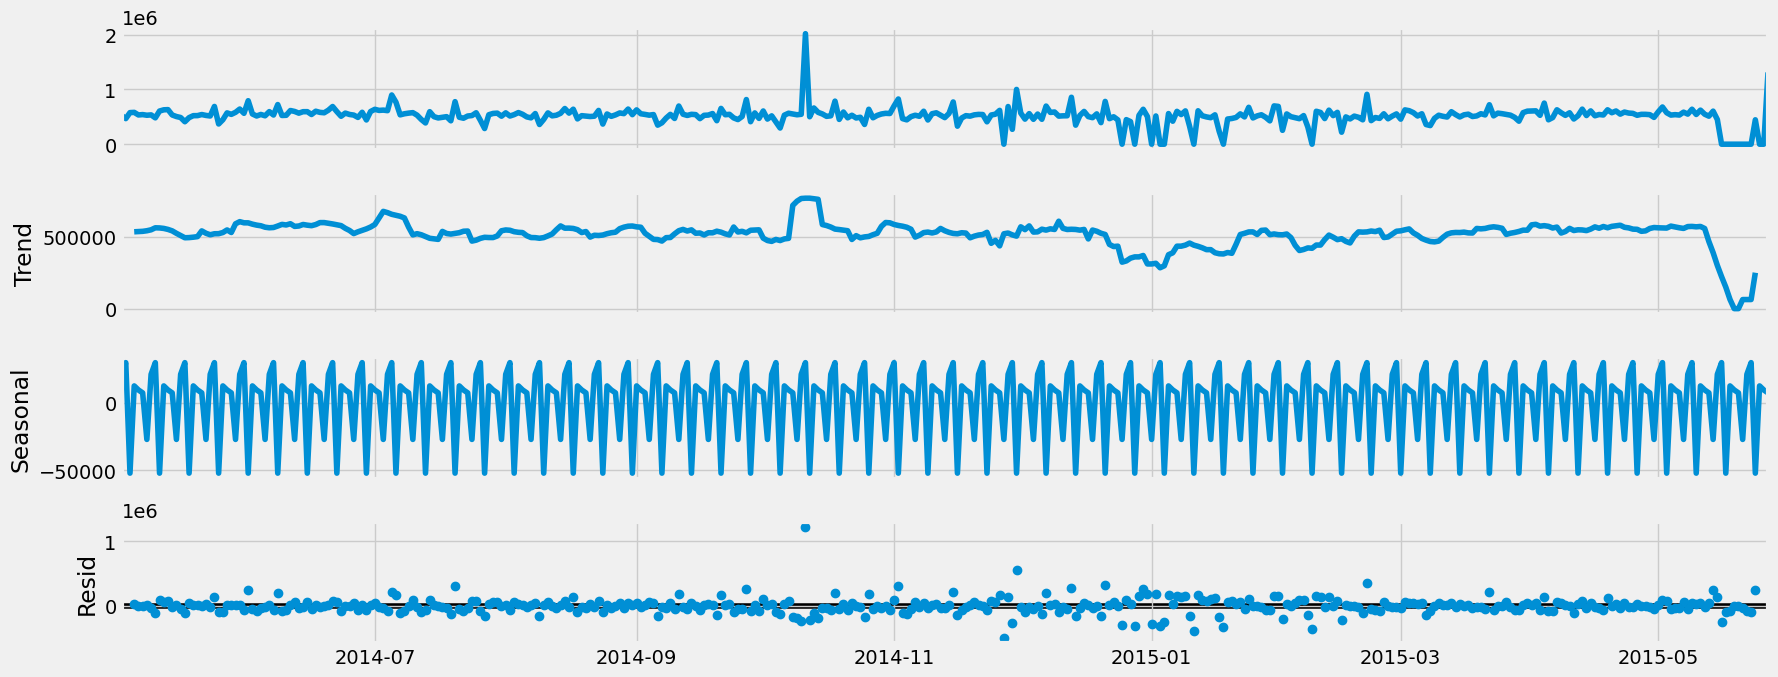

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

## Non-stationary

# Stationarity

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -5.004636
p-value                          0.000022
Number of Lags Used              6.000000
Number of Observations Used    384.000000
Critical Value (1%)             -3.447495
Critical Value (5%)             -2.869096
Critical Value (10%)            -2.570795
dtype: float64


## Significant p-value. Test statistic is larger than the critical value, can't reject the null hypothesis.

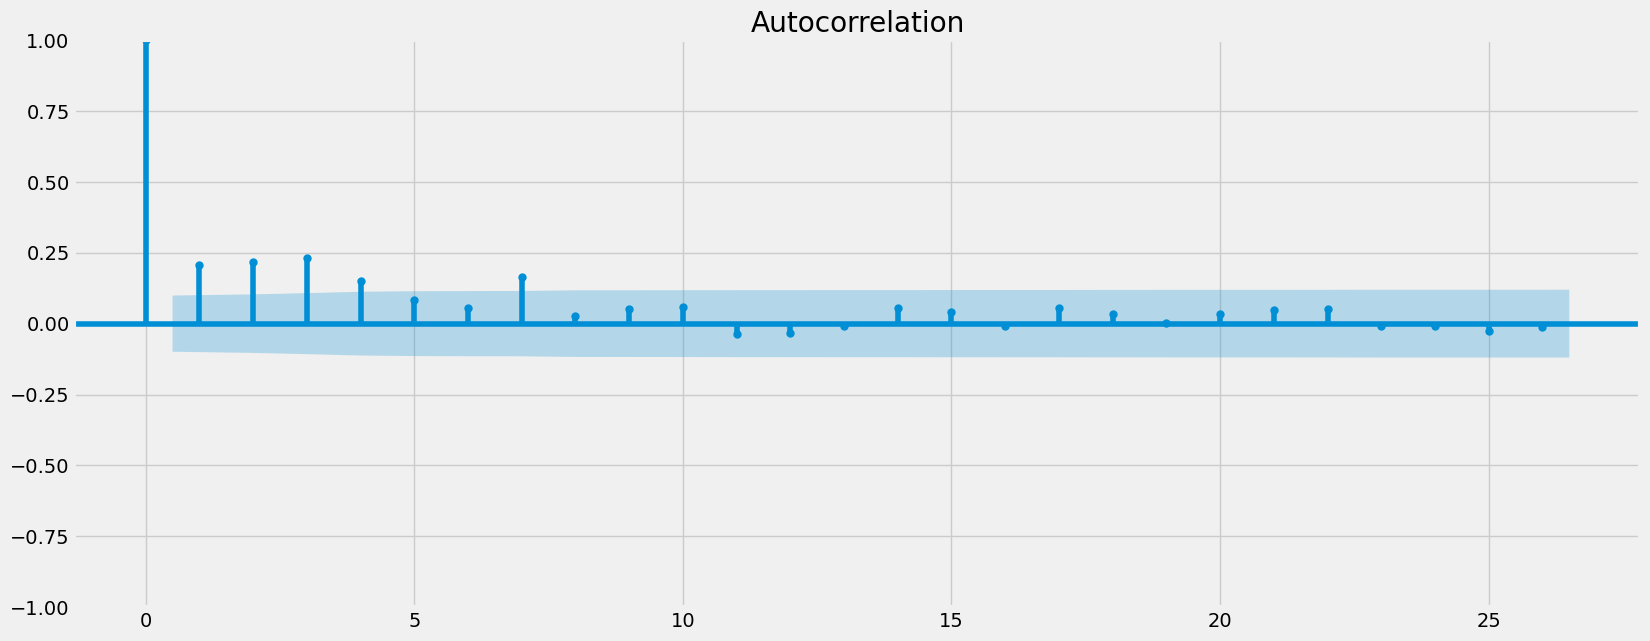

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

## Non-stationary

# Stationarizing Time Series Data

In [28]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [30]:
data_diff.head()

,price
datetime,
2014-05-03,-59281.492537
2014-05-04,109720.000000
2014-05-05,4248.607143
2014-05-06,-46890.703528
2014-05-07,6245.246923


In [31]:
data_diff.columns

Index(['price'], dtype='object')

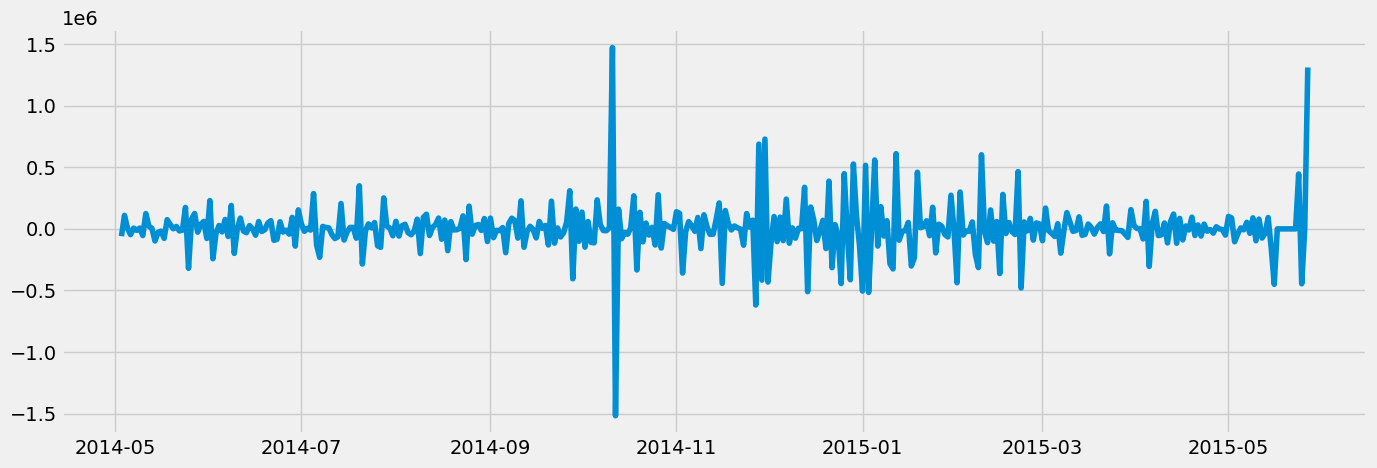

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

## Stationary time series

In [33]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.447336e+00
p-value                        1.698793e-13
Number of Lags Used            1.300000e+01
Number of Observations Used    3.760000e+02
Critical Value (1%)           -3.447862e+00
Critical Value (5%)           -2.869258e+00
Critical Value (10%)          -2.570881e+00
dtype: float64


## p-value insignificant. Test Statistic small than critical value, can reject null hypothesis, stationary

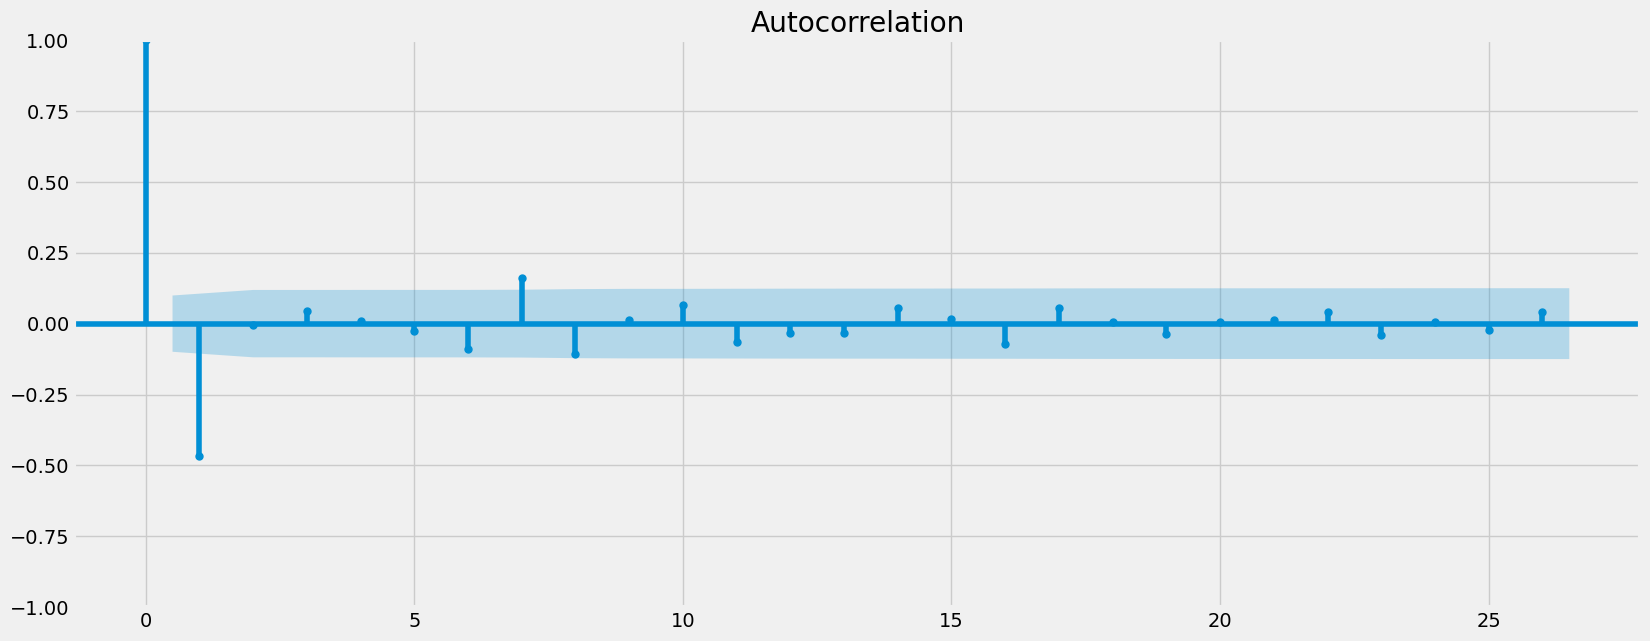

In [34]:
plot_acf(data_diff)
plt.show()